# Example: Pigs
In this example, we want to examine the effect of supplements on weight gain in pigs. We have 82 pigs, belonging to 22 litters.

At the beginning of the study, the pigs are given either 0mg of vitamin E, 100mg of vitamin E, or 200mg of vitamin E. Additionally, the pigs are either give 0mg of copper, 35mg of copper, or 175mg of copper.

Over 12 weeks, the pigs are weighed each week, and the amount that they eat is recorded.

In [1]:
import tisane as ts
import pandas as pd

## Load the data

In [3]:
df = pd.read_csv("pigs.csv")

## Create observed variables

First, we create an environmental variable using `tisane.SetUp`. The concept of time is somewhat outside of any other unit, so we create a variable for it using `tisane.SetUp` instead of `tisane.Unit`.

There were **12** weeks in the study. The weeks are ordered, so we note the order of weeks `order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]` and that `cardinality=12`.

In [4]:
week = ts.SetUp("Time", order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], cardinality=12)

Now, we add our variables for the pigs. Each pig is an individual, and it also has many attributes, so we create a variable `pig` using `tisane.Unit`.

Additionally, there were **82** pigs in the study, so we have `cardinality=82`.

In [5]:
pig = ts.Unit("Pig", cardinality=72)  # 72 pigs

Pigs are also grouped into litters, which are another level, so we also create a `litter` unit. The 82 pigs were grouped in **22** litters.

In [6]:
litter = ts.Unit("Litter", cardinality=21)  # 21 litters

Now we add the attributes that were recorded for each pig. We can attach them to the `pig` unit using `pig.ordinal` and `pig.numeric`.

Ordinals are categorical variables with an ordering to them. Here, there are two ordinals: `vitamin_e` and `copper`. Each pig got separate amounts of each vitamin and mineral.

In [7]:
# Each pig has 1 instance of an ordinal Evit measure
vitamin_e = pig.ordinal(
    "Evit", order=["Evit000", "Evit100", "Evit200"], number_of_instances=1
)
# Each pig has 1 instance of an ordinal Cu measure
copper = pig.ordinal("Cu", order=["Cu000", "Cu035", "Cu175"], number_of_instances=1)

Numerics are either integers or floats, and aren't bounded. Here, the pig's `weight` and the amount of `feed` it consumes are measured each week. 

In [8]:
# Each pig has for each value of week 1 instance of a numeric Weight measure
# Also: Each pig has 1 instance of a Weight measure corresponding to each week
weight = pig.numeric("Weight", number_of_instances=week)
# Each pig has for each value of week 1 instance of a numeric Feed consumption measure
feed = pig.numeric("Feed consumption", number_of_instances=week)

## Conceptual and data measurement relationships

Now that we have all of our variables, we can express further relationships between them.

### Conceptual relationships

We believe that the pigs should gain weight over time, so we express that time (`week`) causes `weight`.

In [9]:
week.causes(weight)

### Data measurement relationships
The pigs were also organized into litters, and we might expect that pigs in the same litter, sharing the same parents and genetics, will be more similar. So we add this relationship with `nests_within`.

In [10]:
pig.nests_within(litter)

## Specify the study design

We can construct our study design using `tisane.Design`. We want to show that `week`, our **i**ndependent **v**ariable predicts `weight`.

We also attach the data we collected to the design.

In [11]:
design = ts.Design(dv=weight, ivs=[week]).assign_data(df)

## Query Tisane to infer a statistical model

Using the `design` specification, `tisane.infer_statistical_model_from_design` will find candidate statistical models to choose from. You can make your choices in the Tisane GUI, which will appear in the output of the following cell.

(You can also launch the Tisane GUI in a regular browser window. Setting `jupyter=True` makes the GUI appear in the output of the cell.)

In [ ]:
ts.infer_statistical_model_from_design(design=design, jupyter=True)

## Using the GUI
Look through each of the tabs. The tabs allow you to add additional independent variables, if Tisane detected they might be useful, as well as add clustering. On the fourth tab, after you pick the data distribution and link function that best fits your data, you can click on the `Generate Code` button, which will output a Python script called `model.py`.

## Import model.py

The script `model.py` should be in this folder! You can import it:

In [13]:
import model

Note that if you re-generate the model in the GUI after you've already imported the model in the above cell, you will need to re-start the kernel by going to the main menu and choosing `Kernel > Restart`.

## Fitting the model

The function `model.fit_model` returns the fitted model, and also outputs statistics about the model's fit.

In [15]:
m = model.fit_model()

Formula: Weight~Time+(1|Litter)+(1|Pig)+(1|Time)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0, 'Litter': 21.0, 'Time': 12.0}

Log-likelihood: -2355.822 	 AIC: 4711.644

Random effects:

                 Name     Var    Std
Pig       (Intercept)  31.315  5.596
Litter    (Intercept)   9.528  3.087
Time      (Intercept)   1.764  1.328
Residual                9.757  3.124

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
(Intercept)    15.686  13.195   18.177  1.271  27.926  12.342    0.0  ***
Time            6.943   6.718    7.169  0.115  10.013  60.228    0.0  ***


## Plotting the residuals

To create a residuals plot, use the function `model.show_model_diagnostics`.

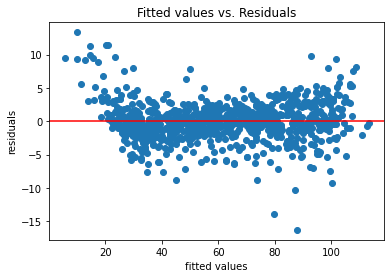

In [16]:
model.show_model_diagnostics(m)